In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import os
import warnings
import harmonypy as hm
import scanorama
import scvi
from time import time



warnings.filterwarnings('ignore')

sc.set_figure_params(figsize=(8, 8), dpi=80, dpi_save=600)

/home/ojanen/data/new_conda/envs/heartmap/lib/python3.11/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/ojanen/data/new_conda/envs/heartmap/lib/python3.11/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/home/ojanen/data/new_conda/envs/heartmap/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Scanorama test

In [2]:
# List all files in the directory containing the datasets
files = os.listdir('../scCAD/jupyter/qclus/benchmarking/qclus_results/dataset_adatas/selected_samples')

# Initialize an empty list to store the separate sample AnnData objects
separated_samples = []

# Load each dataset and separate it by 'sample_id'
for file in files:
    # Load the dataset
    adata = sc.read_h5ad('../scCAD/jupyter/qclus/benchmarking/qclus_results/dataset_adatas/selected_samples/' + file)
    
    # Get unique sample_ids
    unique_sample_ids = adata.obs['sample_id'].unique()
    
    # Separate the dataset by sample_id and add to the list
    for sample_id in unique_sample_ids:
        # Extract the subset of the data for the current sample_id
        sample_adata = adata[adata.obs['sample_id'] == sample_id].copy()
        
        # Add the separated sample to the list
        separated_samples.append(sample_adata)

# Now separated_samples contains 18 AnnData objects, one for each sample


In [3]:
for adata in separated_samples:
    sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

scanorama.integrate_scanpy(separated_samples)

adata = sc.concat(separated_samples, index_unique='_')

# Get all the integrated matrices.
scanorama_int = [ad.obsm['X_scanorama'] for ad in separated_samples]

# make into one matrix.
adata.obsm["Scanorama"] = np.concatenate(scanorama_int)

sc.pp.neighbors(adata, use_rep = "Scanorama")
sc.tl.umap(adata)

#adata.write('data/scanorama.h5ad')

Found 36601 genes among all datasets
[[0.00000000e+00 4.91537896e-01 4.97792494e-01 0.00000000e+00
  7.35835173e-04 0.00000000e+00 2.98013245e-02 0.00000000e+00
  3.31125828e-03 2.68579838e-02 7.46872701e-02 1.41651597e-02
  0.00000000e+00 4.78292862e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.18905007e-01 4.67945718e-04
  9.43650580e-03 1.63781001e-03 6.62143191e-02 3.54609929e-03
  7.53392606e-02 2.38652316e-02 3.41600374e-02 9.34297770e-03
  2.33972859e-04 9.35891437e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.26477310e-04
  3.77460232e-03 1.44478844e-03 1.18708308e-01 8.48999394e-03
  1.65771484e-01 1.27450980e-01 9.03577926e-02 3.46594334e-02
  3.03214069e-04 1.00925147e-02 1.06124924e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.91183607e-01 2.76573787e-01 1.46914789e-03 0.00000000e+00
  7.32421875e-04 2.50312891e-03 1.79562520e-03 3.01386377e-04
  2.40287300e-01 3.36417157e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000

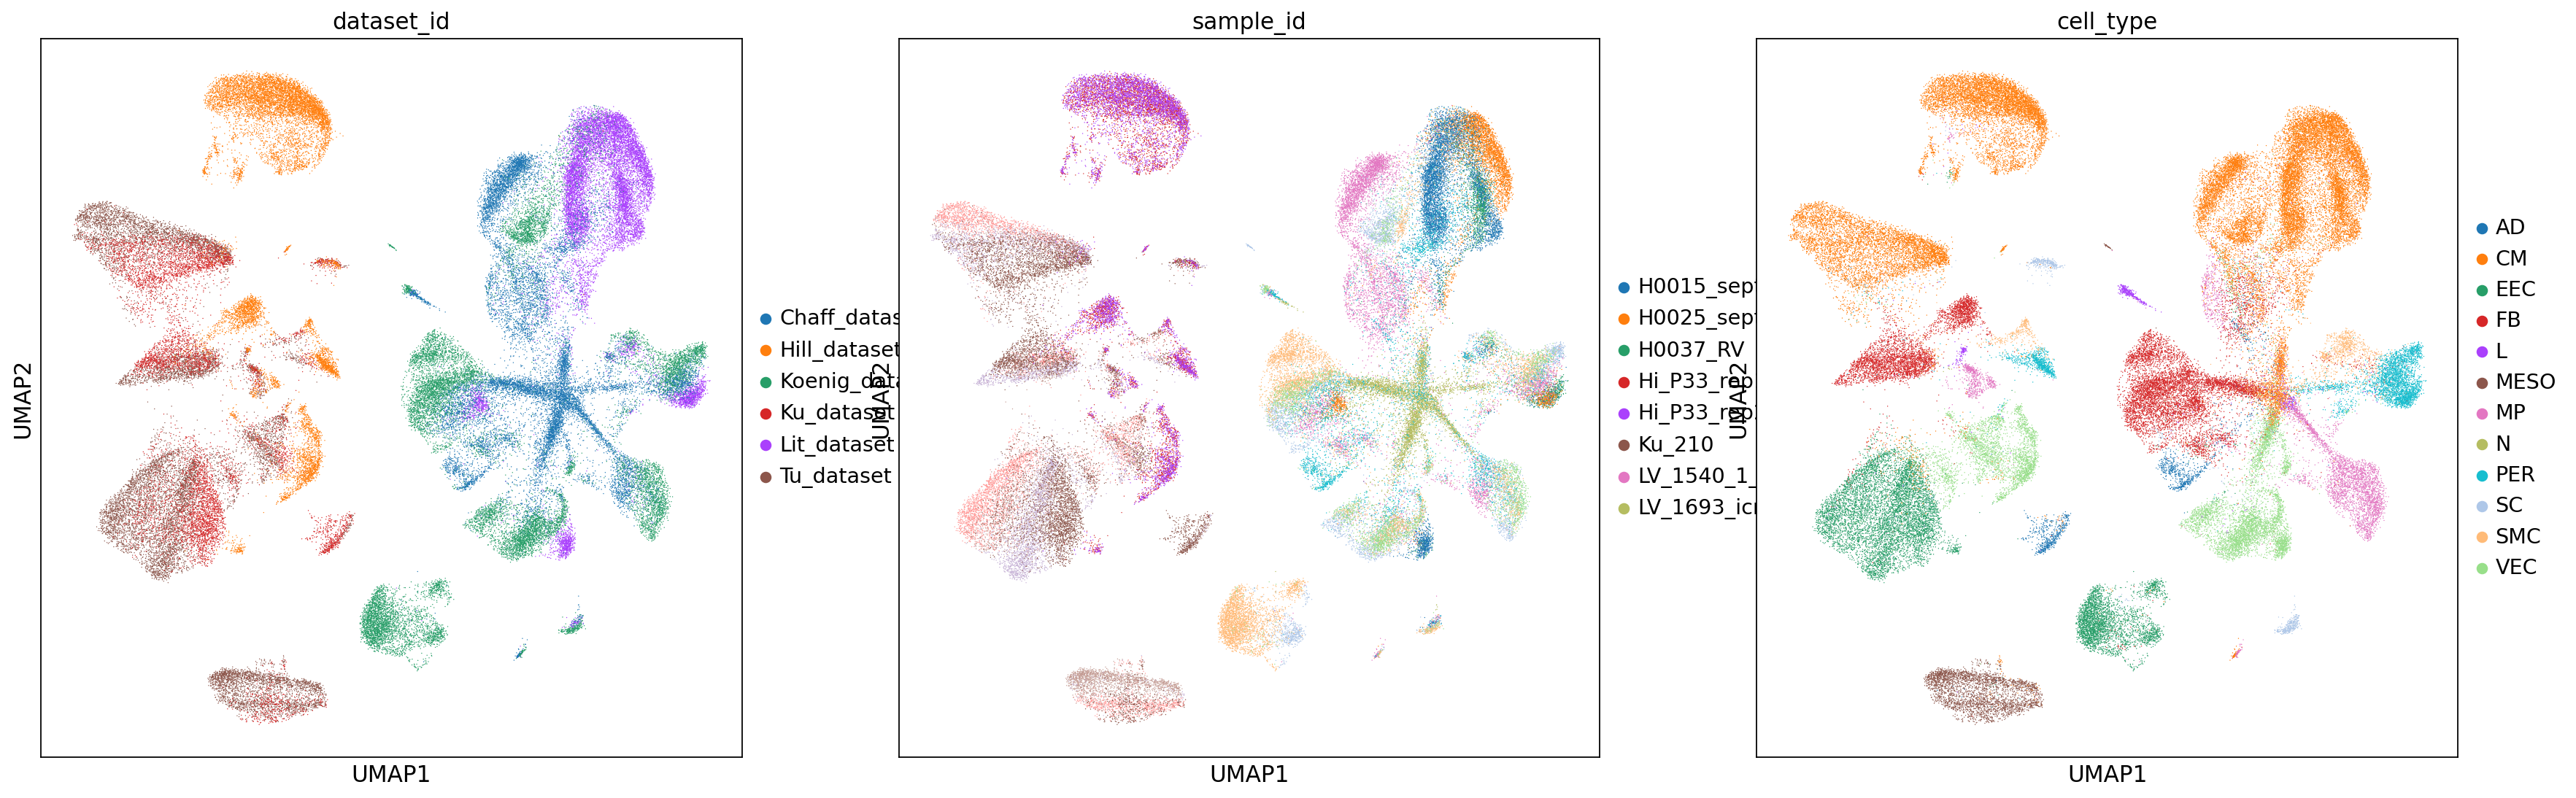

In [4]:
sc.pl.umap(adata, color=['dataset_id', 'sample_id', 'cell_type'], save='_selectedsamples_scanorama.png')

In [5]:
adata.write('data/scanorama.h5ad')